In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


sns.set_style("whitegrid")
%matplotlib inline


## 1. Data Loading
Load the Telco Customer Churn dataset from CSV file and display first 5 rows to understand structure.

In [4]:
df = pd.read_csv('../data/telco_churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Dataset Overview
Check dataset dimensions, column names, data types, and identify any missing values.


In [5]:
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (7043, 21)

Column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values:
cus

## 3. Target Variable Analysis
Examine churn distribution (counts and percentages). Visualize with count plot to show class imbalance.

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


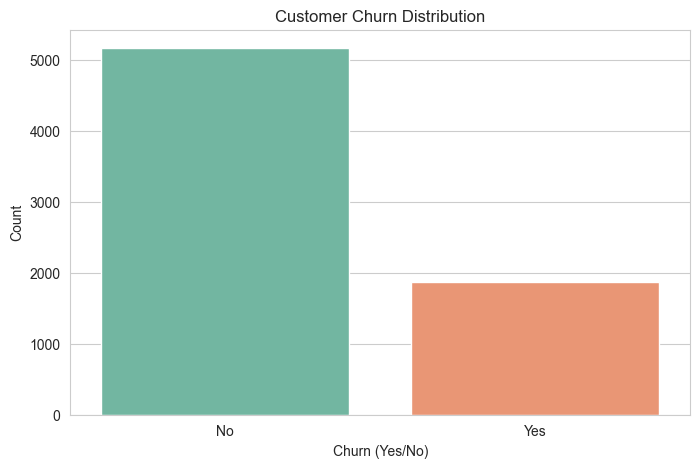

In [6]:
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(churn_counts)
print("\nPercentage:")
print(churn_percentages)

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Count')
plt.show()

## 4. Missing Values Check
Identify columns with missing data, specifically check TotalCharges column for blank string values.


In [7]:
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])


print("\nUnique values in TotalCharges:", df['TotalCharges'].unique()[:10])

Missing values per column:
Series([], dtype: int64)

Unique values in TotalCharges: ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']


## 5. Data Cleaning - TotalCharges
Convert TotalCharges to numeric type, handle conversion errors, and fill missing values with 0 for new customers.

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("TotalCharges NaN count:", df['TotalCharges'].isnull().sum())


df['TotalCharges'].fillna(0, inplace=True)

TotalCharges NaN count: 11


## 6. Numerical Features Distribution
Visualize distributions of tenure, MonthlyCharges, and TotalCharges using histograms with KDE overlay.

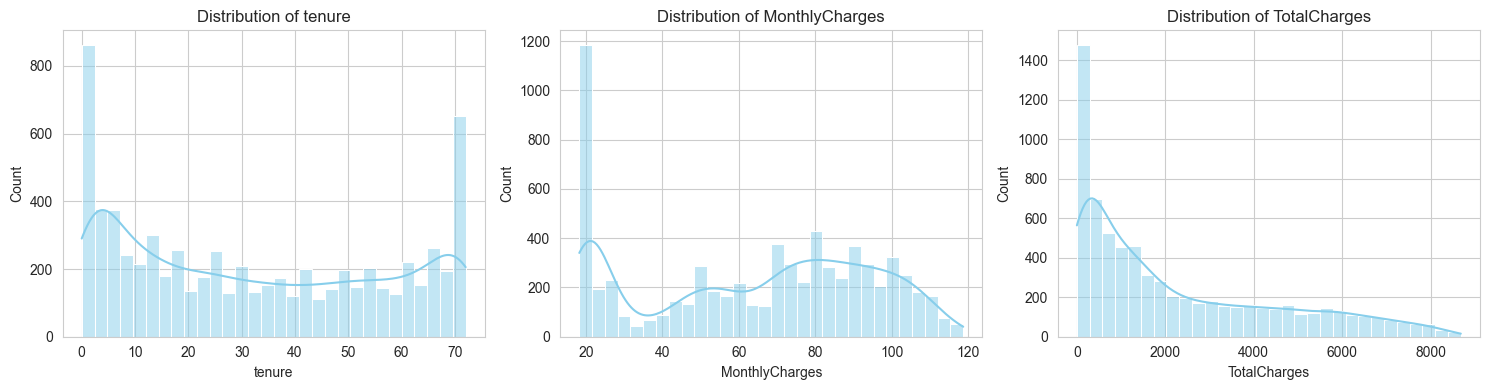

In [9]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 7. Categorical Features Analysis
Analyze churn rates across key categorical features (gender, SeniorCitizen, etc.) using stacked bar charts.

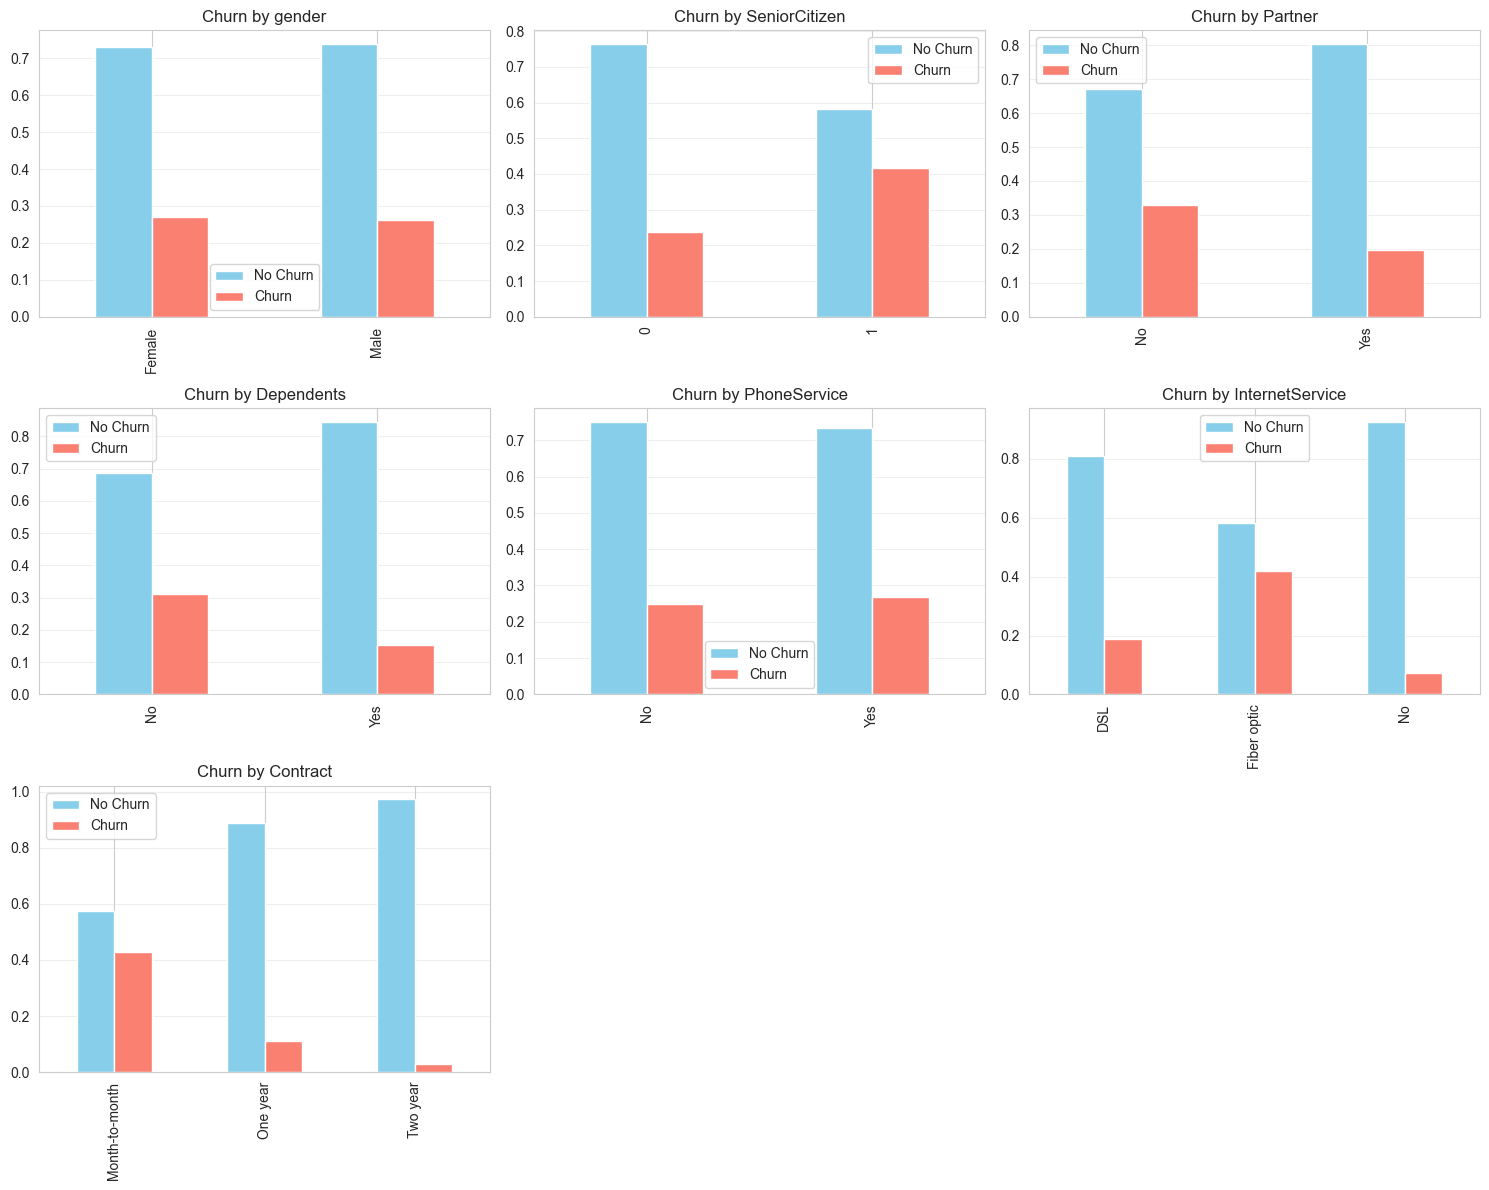

In [17]:
## 7. Categorical Features Analysis

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'InternetService', 'Contract']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_rate.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_xlabel('')
    axes[i].legend(['No Churn', 'Churn'])
    axes[i].grid(axis='y', alpha=0.3)

# Hide unused subplots
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

## 8. Correlation Analysis
Create binary churn target and generate correlation matrix heatmap to identify relationships between numerical features and churn.

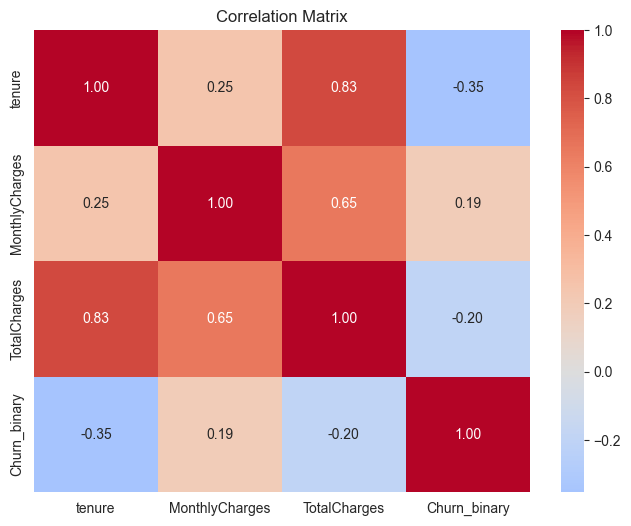

In [11]:
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})


corr_matrix = df[numerical_cols + ['Churn_binary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Matrix')
plt.show()